<a href="https://colab.research.google.com/github/Sajini29/-Risk-of-Giving-Advances-in-the-Tea-Brokerage-Industry/blob/main/Factor_Analysis___Risk_of_Giving_Advances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 In here factor Analysis was performed to create the risk indicator.

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!ls "/content/drive/MyDrive/Asia Siyaka"

ls: cannot access '/content/drive/MyDrive/Asia Siyaka': No such file or directory


In [3]:
import pandas as pd
import numpy as np

In [4]:
csv_file1 = "/content/drive/MyDrive/Asia Siyaka/Final_02_Preprossed.csv"

df = pd.read_csv(csv_file1)

In [5]:
df.head()

,TCode,Average,Stock,StockValue,70%StockValue,Proceeds,AdvanceBalance,IsOverAdvance,AdvanceInterest,OverAdvanceInterest,OverAdvanceAmount,TransferDate,FactoryName,Elevation
0,BF0111,405.56,21681.0,8792943.00,6155060.10,1024871.67,0.00,0,0.00,0.0,0.0,2019-01-03,Pilimatalawa Tea Factory,Low
1,BF0111,431.21,24823.0,10703823.61,7492676.53,1845832.24,0.00,0,0.00,0.0,0.0,2019-01-10,Pilimatalawa Tea Factory,Low
2,BF0111,453.22,22461.0,10179786.44,7125850.51,3240724.52,547607.19,0,285.06,0.0,0.0,2019-01-17,Pilimatalawa Tea Factory,Low
3,BF0111,433.62,20386.0,8839714.59,6187800.21,1272360.23,0.00,0,0.00,0.0,0.0,2019-01-24,Pilimatalawa Tea Factory,Low
4,BF0111,422.17,14782.0,6240460.96,4368322.67,3263006.68,0.00,0,0.00,0.0,0.0,2019-01-31,Pilimatalawa Tea Factory,Low


In [6]:
df.shape

(33518, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33518 entries, 0 to 33517
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TCode                33518 non-null  object 
 1   Average              33518 non-null  float64
 2   Stock                33518 non-null  float64
 3   StockValue           33518 non-null  float64
 4   70%StockValue        33518 non-null  float64
 5   Proceeds             33518 non-null  float64
 6   AdvanceBalance       33518 non-null  float64
 7   IsOverAdvance        33518 non-null  int64  
 8   AdvanceInterest      33518 non-null  float64
 9   OverAdvanceInterest  33518 non-null  float64
 10  OverAdvanceAmount    33518 non-null  float64
 11  TransferDate         33518 non-null  object 
 12  FactoryName          33518 non-null  object 
 13  Elevation            33518 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 3.6+ MB


In [8]:
unique_tcode_count = df['TCode'].nunique()

print(f"Unique TCode Count: {unique_tcode_count}")

Unique TCode Count: 107


creating a copy of dataframe and dropping the TCOde , TransferDate , FactoryName  and Elevation from the copy

In [9]:
df_copy = df.copy()

# Drop the object-type variables for factor analysis
df_factor_analysis = df.drop(['TCode', 'TransferDate' , 'FactoryName' , 'Elevation'], axis=1)

In [10]:
df_factor_analysis.head()

,Average,Stock,StockValue,70%StockValue,Proceeds,AdvanceBalance,IsOverAdvance,AdvanceInterest,OverAdvanceInterest,OverAdvanceAmount
0,405.56,21681.0,8792943.00,6155060.10,1024871.67,0.00,0,0.00,0.0,0.0
1,431.21,24823.0,10703823.61,7492676.53,1845832.24,0.00,0,0.00,0.0,0.0
2,453.22,22461.0,10179786.44,7125850.51,3240724.52,547607.19,0,285.06,0.0,0.0
3,433.62,20386.0,8839714.59,6187800.21,1272360.23,0.00,0,0.00,0.0,0.0
4,422.17,14782.0,6240460.96,4368322.67,3263006.68,0.00,0,0.00,0.0,0.0


In [11]:
df_factor_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33518 entries, 0 to 33517
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average              33518 non-null  float64
 1   Stock                33518 non-null  float64
 2   StockValue           33518 non-null  float64
 3   70%StockValue        33518 non-null  float64
 4   Proceeds             33518 non-null  float64
 5   AdvanceBalance       33518 non-null  float64
 6   IsOverAdvance        33518 non-null  int64  
 7   AdvanceInterest      33518 non-null  float64
 8   OverAdvanceInterest  33518 non-null  float64
 9   OverAdvanceAmount    33518 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.6 MB


Factor Anlaysis

In [12]:
correlation_matrix = df_factor_analysis.corr()

In [13]:
correlation_matrix

,Average,Stock,StockValue,70%StockValue,Proceeds,AdvanceBalance,IsOverAdvance,AdvanceInterest,OverAdvanceInterest,OverAdvanceAmount
Average,1.000000,0.080707,0.409880,0.409880,0.402812,0.204502,0.086121,0.238070,0.098159,0.097883
Stock,0.080707,1.000000,0.834349,0.834349,0.639529,0.094028,-0.103926,0.090049,0.004239,0.004543
StockValue,0.409880,0.834349,1.000000,1.000000,0.774150,0.246184,-0.054798,0.269944,0.071546,0.071600
70%StockValue,0.409880,0.834349,1.000000,1.000000,0.774150,0.246184,-0.054798,0.269944,0.071546,0.071600
Proceeds,0.402812,0.639529,0.774150,0.774150,1.000000,0.147997,-0.104501,0.171296,0.020658,0.020695
AdvanceBalance,0.204502,0.094028,0.246184,0.246184,0.147997,1.000000,0.628556,0.968203,0.837071,0.838288
IsOverAdvance,0.086121,-0.103926,-0.054798,-0.054798,-0.104501,0.628556,1.000000,0.551920,0.596457,0.598798
AdvanceInterest,0.238070,0.090049,0.269944,0.269944,0.171296,0.968203,0.551920,1.000000,0.785401,0.785183
OverAdvanceInterest,0.098159,0.004239,0.071546,0.071546,0.020658,0.837071,0.596457,0.785401,1.000000,0.999631
OverAdvanceAmount,0.097883,0.004543,0.071600,0.071600,0.020695,0.838288,0.598798,0.785183,0.999631,1.000000


Correlation Matrix Heatmap

<ipython-input-14-46f83da2674c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


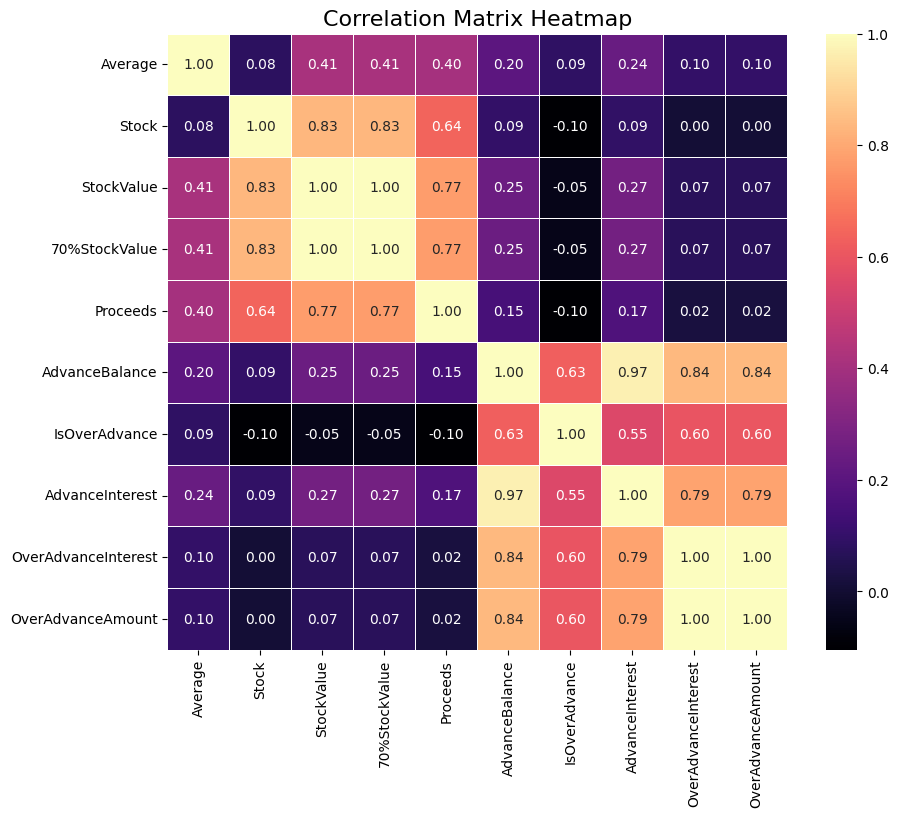

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()


Kaiser-Meyer-Olkin (KMO) Test


 Kaiser-Meyer-Olkin (KMO) Test - Measures sampling adequacy for each variable in the dataset. A KMO value above 0.5 is generally considered acceptable, indicating that the data is suitable for factor analysis. It helps ensure that the variables have enough common variance for meaningful factor extraction

In [15]:
pip install pingouin factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=9ca480822ff69a1ae917359fa29b0368cb1cdad3b602c0e0292500b548f2ed8c
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [16]:
from factor_analyzer.factor_analyzer import calculate_kmo


In [17]:
kmo_all, kmo_model = calculate_kmo(df_factor_analysis)


In [18]:

actual_variable_names = df_factor_analysis.columns

print(f"Overall KMO: {kmo_model:.2f}")

print("Overall KMO and Individual KMO values for each variable:")
for idx, (variable_name, kmo) in enumerate(zip(actual_variable_names, kmo_all)):
    print(f"{variable_name}: {kmo:.2f}")


Overall KMO: 0.76
Overall KMO and Individual KMO values for each variable:
Average: 0.68
Stock: 0.87
StockValue: 0.72
70%StockValue: 0.72
Proceeds: 0.98
AdvanceBalance: 0.74
IsOverAdvance: 0.87
AdvanceInterest: 0.73
OverAdvanceInterest: 0.71
OverAdvanceAmount: 0.71


Overall KMO Value and the KMO vlaue for variables are all greater than 0.6 indicating that the data is suitable for the factor analaysis.

Bartlett's Test of Sphericity

Bartlett's Test of Sphericity: Tests the null hypothesis that the correlation matrix is an identity matrix. A significant result indicates that correlations between variables are not zero, justifying the use of factor analysis. It helps confirm the presence of relationships between variables before proceeding with factor extraction

Used to asses whether the correlation matrix is an identity matrix

Used in factor analysis studies where rejection of null hypothesis of identity is an indication tat the data are suitbale for the factor analysis model.

H0 - Correlation matrix is an identitiy matrix.
need to reject H0 to go with factor analysis

In [ ]:
# from scipy.stats import bartlett
# import pandas as pd

# # Assuming 'df_factor_analysis' is your DataFrame with the variables
# # Extract the correlation matrix
# correlation_matrix = df_factor_analysis.corr()

# # Extract each column as a sample vector
# samples = [correlation_matrix[col].dropna().values for col in correlation_matrix.columns]

# # Perform Bartlett's Test
# statistic, p_value = bartlett(*samples)

# # Display the results
# print(f"Bartlett's Test Statistic: {statistic}")
# print(f"P-value: {p_value}")

# # Check the significance level (e.g., 0.05) to determine whether to reject the null hypothesis
# if p_value < 0.05:
#     print("Reject the null hypothesis. The variables are not unrelated.")
# else:
#     print("Fail to reject the null hypothesis. The variables may be unrelated.")


In [19]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

df_factor_analysis[df_factor_analysis <= 0] = np.finfo(float).eps

chi2, p = calculate_bartlett_sphericity(df_factor_analysis)

print("Bartlett's Test Statistic:", chi2)
print("P-value:", p)


Bartlett's Test Statistic: 1682296.0387522988
P-value: 0.0


Determine the Number of Factors for Factor Analysis

In [20]:
!pip install factor_analyzer


Scree Plot

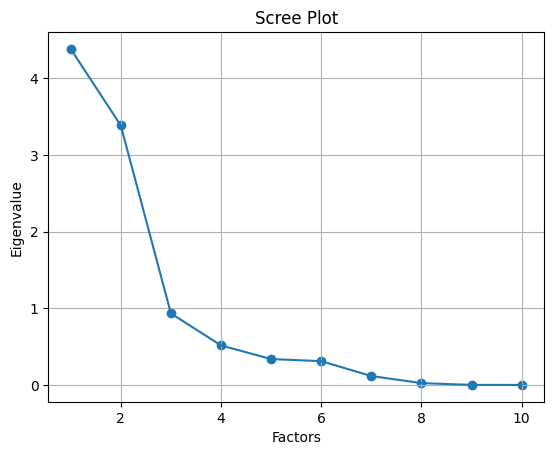

In [21]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Create factor analyzer object
fa = FactorAnalyzer()

# Fit the model6
fa.fit(df_factor_analysis)

# Check the eigenvalues
ev, v = fa.get_eigenvalues()

# Scree plot
plt.scatter(range(1, df_factor_analysis.shape[1]+1), ev)
plt.plot(range(1, df_factor_analysis.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [22]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo


Kaiser's Rule

In [23]:
eigenvalues = fa.get_eigenvalues()

# Determine the number of factors using Kaiser's Rule
n_factors_kaiser = sum(value > 1 for value in eigenvalues)
print("Number of Factors (Kaiser's Rule):", n_factors_kaiser)


Number of Factors (Kaiser's Rule): [2 2 0 0 0 0 0 0 0 0]


Parallel Analysis

In [ ]:
eigenvalues = fa.get_eigenvalues()

eigenvalues_array = eigenvalues[0]

# Use Parallel Analysis to automatically determine the number of factors
n_factors_auto = sum(eigenvalues_array > eigenvalues_array.mean())
print("Automatic Number of Factors (Parallel Analysis):", n_factors_auto)


Automatic Number of Factors (Parallel Analysis): 2


Both Parallel analysis and the kaiser analysis indicates that the needed factors for the factor analysis is 2.


MAP Curve (Minimum Average Partial)

In [24]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Initialize the FactorAnalyzer object
fa = FactorAnalyzer()

# Fit the factor analyzer to your data
fa.fit(df_factor_analysis)

# Perform the MAP test
# map_test_result = fa.get_mev()
map_test_result = fa.get_eigenvalues()


# Display the MAP test results
print("MAP Test Results:")
print(map_test_result)


MAP Test Results:
(array([4.38136023e+00, 3.38341706e+00, 9.32639302e-01, 5.15288450e-01,
       3.37316401e-01, 3.09994750e-01, 1.15901288e-01, 2.37349830e-02,
       3.47539330e-04, 2.27440288e-16]), array([ 4.221467  ,  3.26548818,  0.71347538,  0.20381306,  0.08318779,
       -0.01715779, -0.04091032, -0.135805  , -0.14935096, -0.16592127]))


The eigenvalues represent the amount of variance explained by each factor. In this case, the first two factors contribute significantly, as indicated by their higher eigenvalues (4.38 and 3.38).
The residuals array provides the difference between the observed eigenvalues and the expected eigenvalues under the assumption of no additional factors. Positive residuals suggest potential factors to retain.
Eigenvalues greater than 1 are often considered significant in factor analysis, indicating factors that explain more variance than a single variable.

This method also suggests the use of 2 factors

Perform factor analyzer using 2 factors

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Standardize the data for factor analysis
scaler = StandardScaler()
df_factor_analysis_standardized = scaler.fit_transform(df_factor_analysis)

In [27]:
# Initialize FactorAnalyzer with 2 factors (as per kasier's rule and parralle analysis)
fa = FactorAnalyzer(n_factors= 2, rotation='varimax')

In [28]:
# Fit the factor analyzer to your standardized data
fa.fit(df_factor_analysis_standardized)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [29]:
# Get factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=df_factor_analysis.columns, columns=[f'Factor_{i+1}' for i in range(2)])
print("Factor Loadings:")
print(factor_loadings)

Factor Loadings:
                     Factor_1  Factor_2
Average              0.135831  0.366969
Stock               -0.052610  0.794982
StockValue           0.053559  1.003430
70%StockValue        0.053559  1.003430
Proceeds            -0.003845  0.795594
AdvanceBalance       0.944396  0.196438
IsOverAdvance        0.654083 -0.091910
AdvanceInterest      0.882234  0.220908
OverAdvanceInterest  0.938612  0.022506
OverAdvanceAmount    0.939712  0.022445


In [31]:
# Determine which variables are associated with each factor
variables_per_factor = {}
loading_threshold = 0.5

for factor_index in range(2):
    loadings = factor_loadings[f'Factor_{factor_index + 1}']
    significant_loadings = df_factor_analysis.columns[abs(loadings) > loading_threshold]
    variables_per_factor[f'Factor {factor_index + 1}'] = significant_loadings

# Interpretation
print("\nVariable Assignment (After Varimax Rotation):")
for factor, variables in variables_per_factor.items():
    print(f"{factor}: {', '.join(variables)}")


Variable Assignment (After Varimax Rotation):
Factor 1: AdvanceBalance, IsOverAdvance, AdvanceInterest, OverAdvanceInterest, OverAdvanceAmount
Factor 2: Stock, StockValue, 70%StockValue, Proceeds


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis


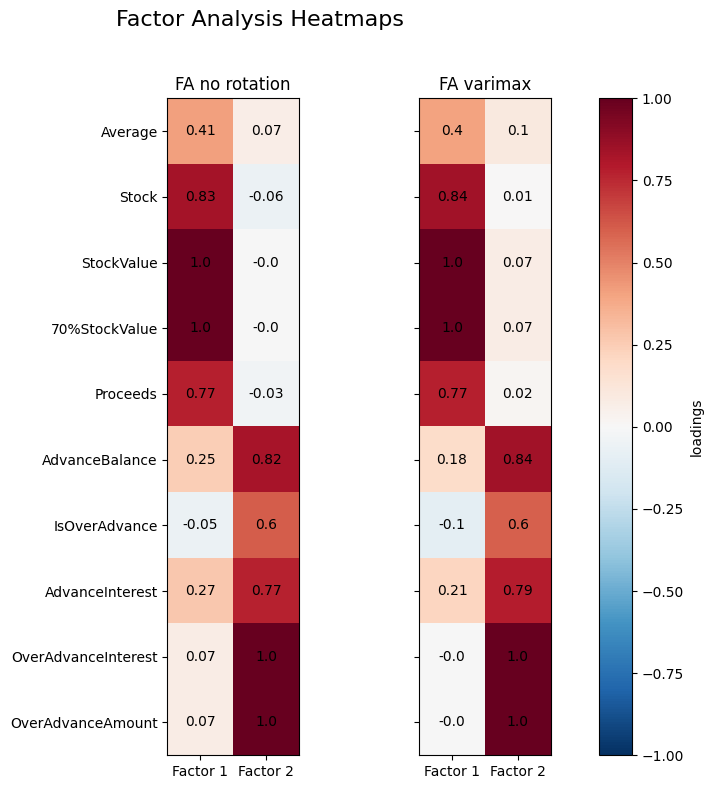

In [33]:
X = df_factor_analysis_standardized
factors = 2
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components=factors)),
    ("FA varimax", FactorAnalysis(n_components=factors, rotation="varimax")),
]

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

# Add a common title for all subplots
fig.suptitle("Factor Analysis Heatmaps", fontsize=16)

'''
And loop over the variants of our analysis `fas`, zipped with the
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i, j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(df_factor_analysis.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(df_factor_analysis.columns)
    else:
        ax.set_yticklabels([])
    # Set subplot title
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout(rect=[0, 0, 1, 0.96])

#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()


In [34]:
df_factor_analysis

,Average,Stock,StockValue,70%StockValue,Proceeds,AdvanceBalance,IsOverAdvance,AdvanceInterest,OverAdvanceInterest,OverAdvanceAmount
0,405.56,2.168100e+04,8.792943e+06,6.155060e+06,1.024872e+06,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
1,431.21,2.482300e+04,1.070382e+07,7.492677e+06,1.845832e+06,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
2,453.22,2.246100e+04,1.017979e+07,7.125851e+06,3.240725e+06,5.476072e+05,2.220446e-16,2.850600e+02,2.220446e-16,2.220446e-16
3,433.62,2.038600e+04,8.839715e+06,6.187800e+06,1.272360e+06,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
4,422.17,1.478200e+04,6.240461e+06,4.368323e+06,3.263007e+06,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
...,...,...,...,...,...,...,...,...,...,...
33513,684.05,1.296000e+04,8.865296e+06,6.205707e+06,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
33514,684.05,1.500000e+04,1.026076e+07,7.182532e+06,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
33515,665.44,1.412000e+04,9.396076e+06,6.577253e+06,2.295546e+05,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
33516,656.06,5.220000e+03,3.424612e+06,2.397229e+06,3.628080e+06,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16


In [35]:
from pandas import Series

Uniquness of the Factors

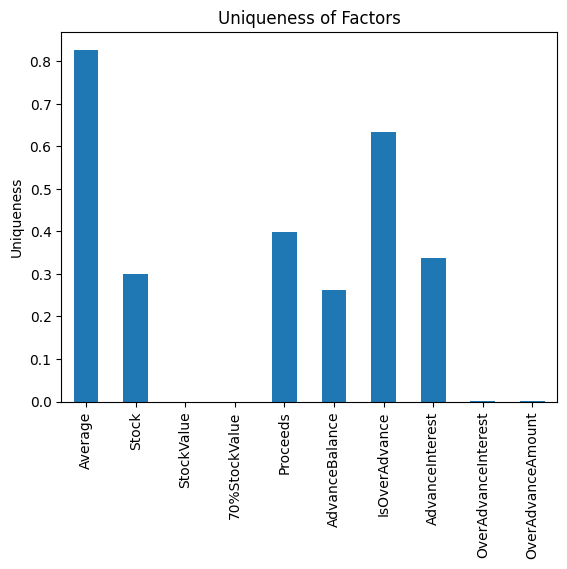

In [36]:
fa = FactorAnalysis(n_components = 2, rotation="varimax")
fa.fit(df_factor_analysis_standardized)
uniqueness = Series(fa.noise_variance_, index=df_factor_analysis.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)
plt.title("Uniqueness of Factors", fontsize=12)
plt.show()

The uniqueness, which ranges from 0 to 1. It is, sometimes also referred to as (white) noise, corresponds to the proportion of variability that can not be explained by a linear combination of the factors.  A high uniqueness for a variable indicates that the factors do not account well for its variance.

Communality

<Axes: ylabel='communality'>

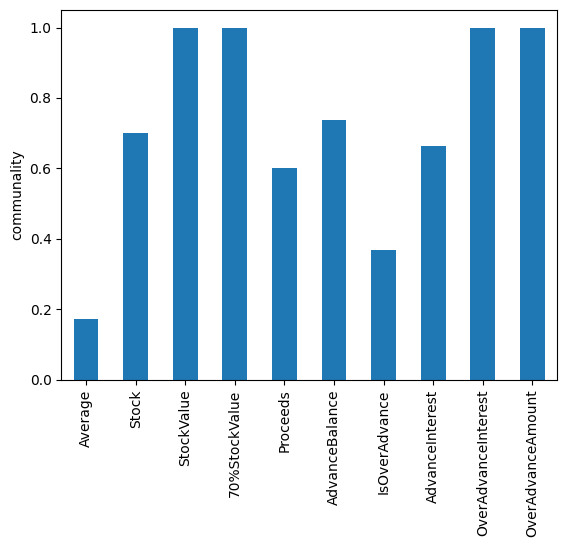

In [37]:
# Communality
communality = Series(np.square(fa.components_.T).sum(axis=1), index=df_factor_analysis.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)

By squaring the loading we can compute the fraction of the variable’s total variance explained by the factors (Teetor 2011{target="_blank"}). This proportion of the variability is denoted as communality.

A way way to calculate the the uniqueness, when you already computed the communlity is to subtract it from 1. An appropriate factor model results in low values for uniqueness and high values for communality. So if we see bad results for our model, we could try a different number of underlying factors (latent variables).

Residual Matrix for Factor Analysis

In [38]:
# the word 'lambda' is reserved for a python-operator, so we use the underscore at the end
lambda_ = fa.components_
psi = np.diag(uniqueness)
s = np.corrcoef(np.transpose(X))
sigma = np.matmul(lambda_.T, lambda_) + psi
residuals = (s - sigma)

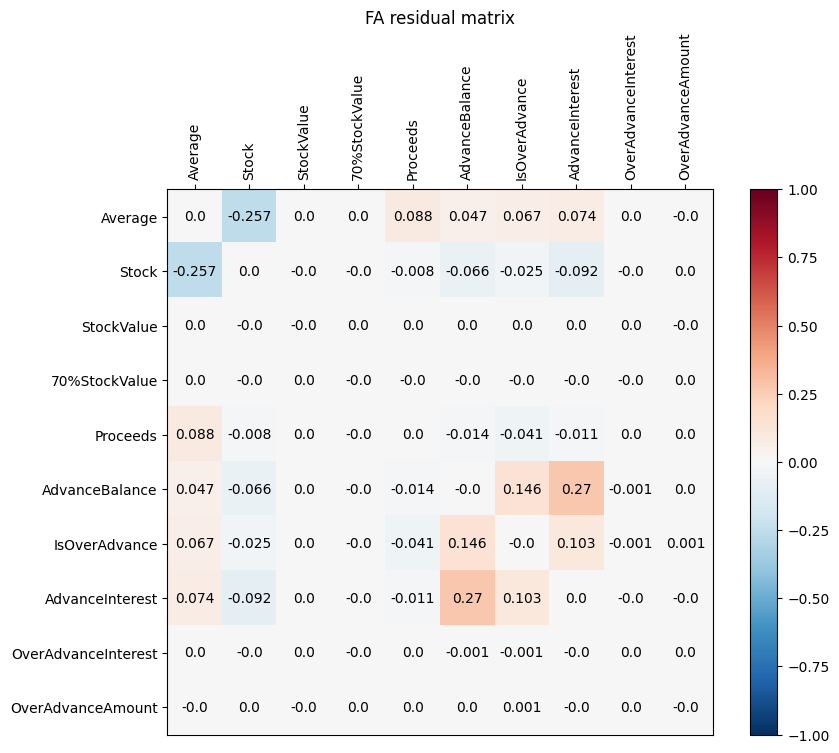

In [39]:
import matplotlib.pyplot as plt

# Initialize the plot axes
fig, ax = plt.subplots()

# Plot the heatmap
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)

# Adjust tick parameters for x-axis
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True, rotation=90)

# Set tick positions and labels for x-axis
ax.set_xticks(range(10))
ax.set_xticklabels(df_factor_analysis.columns, fontsize=10)

# Set tick positions and labels for y-axis
ax.set_yticks(range(10))
ax.set_yticklabels(df_factor_analysis.columns)

# Add text annotations to each cell of the heatmap
for (i, j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

# Add colorbar
fig.colorbar(im, ax=ax, location='right')

ax.set_title("FA Residual Matrix")

plt.tight_layout()

plt.gcf().set_size_inches(10, 10)
ax.set_title("FA residual matrix")
plt.show()


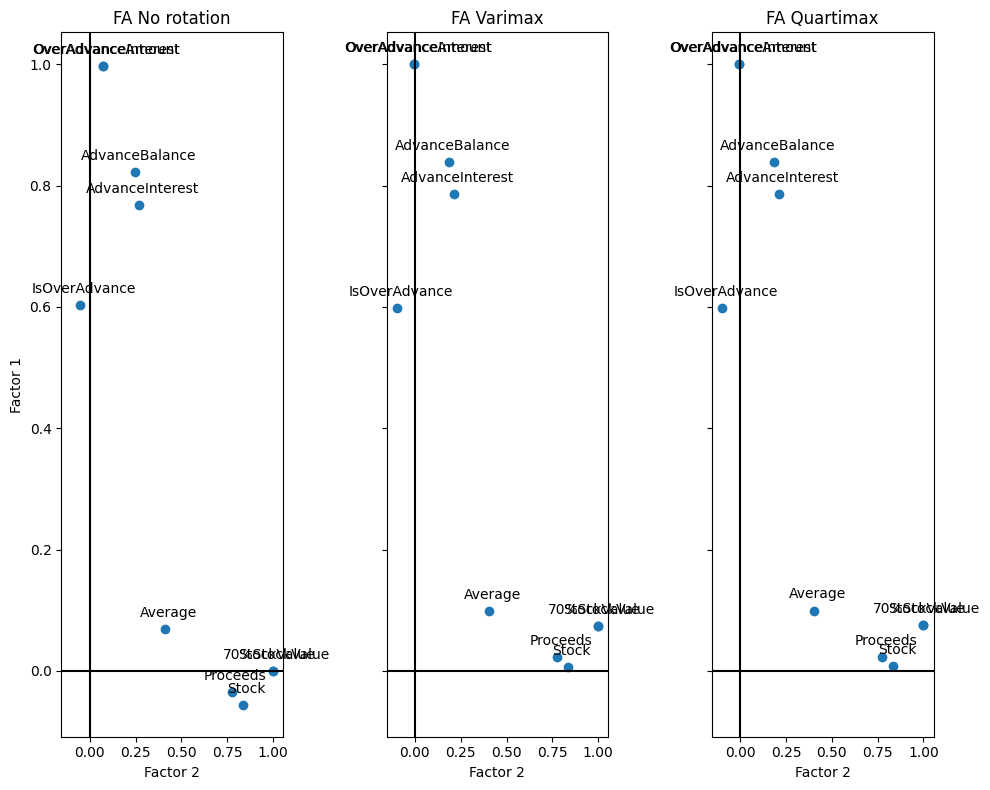

In [40]:
methods = [
    ("FA No rotation", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)

    components = fa.components_

    vmax = np.abs(components).max()
    ax.scatter(components[0,:], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
    for i,j, z in zip(components[0, :], components[1, :], df_factor_analysis.columns):
        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()

If two variables have loadings further away from 0 for the same factor, we know they are related


Get factor loadings

In [ ]:
# # Identify Variables for Each Factor
# variables_per_factor = {}

# # Iterate through each factor
# for factor_index in range(n_factors_auto):
#     # Get loadings for the current factor
#     loadings = factor_loadings[:, factor_index]

#     # Create a boolean index based on the condition
#     bool_index = abs(loadings) > loading_threshold

#     # Ensure the boolean index has the correct length
#     bool_index = np.append(bool_index, False)

#     # Get column names that satisfy the condition
#     significant_loadings = df_factor_analysis.columns[bool_index]

#     # Store the result in the dictionary
#     variables_per_factor[f'Factor {factor_index + 1}'] = significant_loadings

# # Print the results
# print("\nVariable Assignment (After Factor Analysis):")
# for factor, variables in variables_per_factor.items():
#     print(f"{factor}: {', '.join(variables)}")


When variables load onto more than one factor, it suggests that these variables are influenced by multiple underlying latent factors. This is known as cross-loading.

To create a single variable using the factors obtained from factor analysis, you can use factor scores. Factor scores represent the contribution of each observation to each factor.

Use FactorAnalyzer to Extract Factor Scores:

In [ ]:
from factor_analyzer import FactorAnalyzer
factor_scores = fa.transform(df_factor_analysis_standardized)
factor_scores

In [42]:
factor_scores

array([[-0.6719377 , -0.22242583],
       [-0.606477  , -0.22219017],
       [-0.62443045, -0.22223362],
       ...,
       [-0.65127767, -0.22233321],
       [-0.85584041, -0.22307795],
       [-0.9731567 , -0.22350121]])

Combine Factor Scores into a Single Variable:

In [43]:
# Assuming you have 3 factors, adjust accordingly
df['Composite_Variable'] = factor_scores[:, 0] + factor_scores[:, 1] + factor_scores[:, 2]


IndexError: index 2 is out of bounds for axis 1 with size 2

Combine Factor Scores into a Single Variable using Sigmoid Function:

In [44]:
import numpy as np

composite_variable = np.sum(factor_scores, axis=1)
df['Composite_Variable_Sigmoid'] = 1 / (1 + np.exp(-composite_variable))


In [45]:
composite_variable = np.sum(factor_scores, axis=1)
df['Composite_Variable_Sigmoid'] = 1 / (1 + np.exp(-composite_variable))

In [46]:
df.head()

,TCode,Average,Stock,StockValue,70%StockValue,Proceeds,AdvanceBalance,IsOverAdvance,AdvanceInterest,OverAdvanceInterest,OverAdvanceAmount,TransferDate,FactoryName,Elevation,Composite_Variable_Sigmoid
0,BF0111,405.56,21681.0,8792943.00,6155060.10,1024871.67,0.00,0,0.00,0.0,0.0,2019-01-03,Pilimatalawa Tea Factory,Low,0.290210
1,BF0111,431.21,24823.0,10703823.61,7492676.53,1845832.24,0.00,0,0.00,0.0,0.0,2019-01-10,Pilimatalawa Tea Factory,Low,0.303927
2,BF0111,453.22,22461.0,10179786.44,7125850.51,3240724.52,547607.19,0,285.06,0.0,0.0,2019-01-17,Pilimatalawa Tea Factory,Low,0.300133
3,BF0111,433.62,20386.0,8839714.59,6187800.21,1272360.23,0.00,0,0.00,0.0,0.0,2019-01-24,Pilimatalawa Tea Factory,Low,0.290542
4,BF0111,422.17,14782.0,6240460.96,4368322.67,3263006.68,0.00,0,0.00,0.0,0.0,2019-01-31,Pilimatalawa Tea Factory,Low,0.272471


Mapping to Probability Range:

The sigmoid function, also known as the logistic function, maps real values into the range (0, 1).
It is commonly used in logistic regression to model the probability of an event occurring.
Interpretability:

The sigmoid function provides a natural interpretation as probabilities, making it suitable when you want the composite variable to represent a probability-like score.
Context of Factor Analysis:

Factor analysis often deals with latent constructs or factors that might be associated with underlying probabilities or likelihoods.
In contrast, min-max scaling simply normalizes values to the range (0, 1) without considering their distribution or interpretation as probabilities.

Ultimately, the choice between the sigmoid function and min-max scaling depends on the context and the specific requirements of your analysis. If the goal is to map factor scores to a probability-like scale, the sigmoid function is a meaningful choice.

Min max Scaler

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
# Min-Max Scaling to map values to the range (0, 1)
scaler = MinMaxScaler()
df['Composite_Variable_MinMax'] = scaler.fit_transform(composite_variable.reshape(-1, 1))

In [49]:
df.head()

,TCode,Average,Stock,StockValue,70%StockValue,Proceeds,AdvanceBalance,IsOverAdvance,AdvanceInterest,OverAdvanceInterest,OverAdvanceAmount,TransferDate,FactoryName,Elevation,Composite_Variable_Sigmoid,Composite_Variable_MinMax
0,BF0111,405.56,21681.0,8792943.00,6155060.10,1024871.67,0.00,0,0.00,0.0,0.0,2019-01-03,Pilimatalawa Tea Factory,Low,0.290210,0.015107
1,BF0111,431.21,24823.0,10703823.61,7492676.53,1845832.24,0.00,0,0.00,0.0,0.0,2019-01-10,Pilimatalawa Tea Factory,Low,0.303927,0.018389
2,BF0111,453.22,22461.0,10179786.44,7125850.51,3240724.52,547607.19,0,285.06,0.0,0.0,2019-01-17,Pilimatalawa Tea Factory,Low,0.300133,0.017490
3,BF0111,433.62,20386.0,8839714.59,6187800.21,1272360.23,0.00,0,0.00,0.0,0.0,2019-01-24,Pilimatalawa Tea Factory,Low,0.290542,0.015187
4,BF0111,422.17,14782.0,6240460.96,4368322.67,3263006.68,0.00,0,0.00,0.0,0.0,2019-01-31,Pilimatalawa Tea Factory,Low,0.272471,0.010722


In [ ]:
output_csv_file = "/content/drive/MyDrive/Asia Siyaka/Final_02_FactorAnalysis.csv"
df.to_csv(output_csv_file, index=False)